# Project 1: Implement PCA on European Social Survey Data (R7 2014)
### Zixun Hao zh210
The module I want to explore is "social inequalities in health", which most recently apears in the 2014 edition of the ESS. Codebook for this edition can be found here: https://www.europeansocialsurvey.org/docs/round7/survey/ESS7_appendix_a7_e01_0.pdf.

## Import and preprocess the data

In [2]:
### Packages
import pandas as pd
import numpy as np
import sas7bdat
from plotnine import *
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_sas('ESS7e02_2.sas/ess7e02_2.sas7bdat',format='sas7bdat')
df.head()

,name,essround,edition,proddate,idno,cntry,tvtot,tvpol,ppltrst,pplfair,...,inwtm,spltadmf,supqad1,supqad2,supqdd,supqmm,supqyr,dweight,pspwght,pweight
0,b'ESS7e02_2',7.0,b'2.2',b'01.12.2018',1.0,b'AT',4.0,1.0,7.0,7.0,...,49.0,1.0,6.0,1.0,24.0,3.0,2015.0,0.938075,0.870571,0.406019
1,b'ESS7e02_2',7.0,b'2.2',b'01.12.2018',2.0,b'AT',7.0,3.0,5.0,5.0,...,67.0,1.0,6.0,1.0,26.0,3.0,2015.0,0.938075,0.864030,0.406019
2,b'ESS7e02_2',7.0,b'2.2',b'01.12.2018',3.0,b'AT',6.0,2.0,6.0,8.0,...,58.0,2.0,6.0,1.0,26.0,3.0,2015.0,0.938075,1.418770,0.406019
3,b'ESS7e02_2',7.0,b'2.2',b'01.12.2018',4.0,b'AT',3.0,1.0,5.0,3.0,...,43.0,1.0,6.0,1.0,24.0,3.0,2015.0,0.938075,1.025929,0.406019
4,b'ESS7e02_2',7.0,b'2.2',b'01.12.2018',5.0,b'AT',2.0,2.0,3.0,7.0,...,54.0,2.0,6.0,1.0,24.0,3.0,2015.0,0.938075,0.738789,0.406019


In [7]:
df.describe()

,essround,idno,tvtot,tvpol,ppltrst,pplfair,pplhlp,polintr,psppsgv,actrolg,...,inwtm,spltadmf,supqad1,supqad2,supqdd,supqmm,supqyr,dweight,pspwght,pweight
count,40185.0,4.018500e+04,40185.000000,40185.000000,40185.000000,40185.000000,40185.000000,40185.000000,40185.000000,40185.000000,...,38587.000000,40185.000000,40185.000000,40185.000000,40185.000000,40185.000000,40185.000000,40185.000000,40185.000000,40185.000000
mean,7.0,6.464965e+06,4.263954,5.519273,5.364987,6.376036,5.428667,2.589424,5.522160,5.171084,...,57.350118,1.792385,5.327709,1.730422,16.509917,8.504367,2072.039965,1.000000,1.000000,0.872549
std,0.0,2.301783e+07,4.157226,14.855637,4.275186,7.178113,5.461163,0.964078,13.155264,11.666905,...,21.185672,0.871223,1.718314,1.765553,11.258755,8.501267,675.852542,0.365259,0.470060,0.912769
min,7.0,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2014.000000,0.002272,0.002338,0.054012
25%,7.0,1.293000e+03,2.000000,1.000000,4.000000,5.000000,4.000000,2.000000,2.000000,1.000000,...,45.000000,1.000000,6.000000,1.000000,8.000000,5.000000,2014.000000,0.943731,0.721642,0.230129
50%,7.0,2.748000e+03,4.000000,2.000000,5.000000,6.000000,5.000000,3.000000,3.000000,3.000000,...,54.000000,2.000000,6.000000,1.000000,16.000000,9.000000,2014.000000,1.000000,0.929546,0.446609
75%,7.0,2.038200e+04,6.000000,3.000000,7.000000,7.000000,7.000000,3.000000,5.000000,6.000000,...,66.000000,2.000000,6.000000,1.000000,24.000000,11.000000,2015.000000,1.000067,1.188729,2.049104
max,7.0,1.000056e+08,99.000000,99.000000,99.000000,99.000000,99.000000,9.000000,99.000000,99.000000,...,772.000000,9.000000,9.000000,6.000000,99.000000,99.000000,9999.000000,4.000000,4.044253,2.796742


In [9]:
print(df.columns.tolist())

['name', 'essround', 'edition', 'proddate', 'idno', 'cntry', 'tvtot', 'tvpol', 'ppltrst', 'pplfair', 'pplhlp', 'polintr', 'psppsgv', 'actrolg', 'psppipl', 'cptppol', 'ptcpplt', 'etapapl', 'trstprl', 'trstlgl', 'trstplc', 'trstplt', 'trstprt', 'trstep', 'trstun', 'vote', 'prtvtbat', 'prtvtcbe', 'prtvtech', 'prtvtdcz', 'prtvede1', 'prtvede2', 'prtvtcdk', 'prtvteee', 'prtvtces', 'prtvtcfi', 'prtvtcfr', 'prtvtbgb', 'prtvtehu', 'prtvtaie', 'prtvtcil', 'prtvalt1', 'prtvalt2', 'prtvalt3', 'prtvtfnl', 'prtvtbno', 'prtvtcpl', 'prtvtbpt', 'prtvtbse', 'prtvtesi', 'contplt', 'wrkprty', 'wrkorg', 'badge', 'sgnptit', 'pbldmn', 'bctprd', 'clsprty', 'prtclcat', 'prtclcbe', 'prtclech', 'prtcldcz', 'prtclede', 'prtclcdk', 'prtcleee', 'prtcldes', 'prtclcfi', 'prtcldfr', 'prtclbgb', 'prtclehu', 'prtclcie', 'prtcldil', 'prtclalt', 'prtclenl', 'prtclbno', 'prtclfpl', 'prtcldpt', 'prtclbse', 'prtclesi', 'prtdgcl', 'lrscale', 'stflife', 'stfeco', 'stfgov', 'stfdem', 'stfedu', 'stfhlth', 'gincdif', 'freehms', 

In [10]:
# find the start of the health and inequality module
print(df.columns.get_loc("etfruit"))
print(df.columns.get_loc("fnsdfml"))

# find the end of the health and inequality module
print(df.columns.get_loc("jbexpvi"))
print(df.columns.get_loc("jbexena"))

204
294
417
436


In [11]:
# see the frequencies for Respondent's identification number (idno)
df.idno.value_counts().sort_values()

4412.0       1
12538.0      1
112206.0     1
112207.0     1
10954.0      1
            ..
1253.0      12
980.0       12
1043.0      12
1174.0      12
1117.0      12
Name: idno, Length: 18859, dtype: int64

In [17]:
# drop duplicate on specific columns (idno) -- not sure if should be done
df1 = df.drop_duplicates(subset=['idno'], keep='last')
df1.shape

(18859, 601)

<b>We see that there are respondents who repeatedly answered the survey. However, if we drop the duplicates based on "idno" variable (respondent's identification number) and keep the last entry, only 18859 observations remain. It's possible that respondent id is not a unique identifier of individual respondents. So, I decide not to drop duplicates. <br>
Also, we only keep all the variables that pertain to the "Health and Inequality" module based on the survey codebook.<b>

In [4]:
# select only the variables of the health and inequality module
temp1 = df.iloc[:, 204:(294+1)]
temp2 = df.iloc[:, 417:(436+1)]
anypacc= df[["anypacc"]]
ess = pd.concat([temp1, anypacc,temp2], axis=1)
# drop all the "refusal", "don't know", and "no answer" columns
# for example: "Discussed health, last 12 months: no answer"
ess = ess.drop(columns=['dshltna', 'medtrna','trhltna','hltprna','hltphna',"jbexpna","jbexena",
                        "dshltdk","medtrdk","trhltdk","hltprdk","hltphdk", "jbexpdk","jbexedk",
                       "dshltref","medtrref", "trhltref","hltprref","hltphref","jbexpref","jbexeref"])


In [5]:
## Check missing, sort by ascending order
ess.isna().sum().sort_values()

etfruit       0
trhlthy       0
trhltmt       0
trhltpt       0
trhltre       0
           ... 
hltphpf    2051
hltphsd    2051
hltphsh    2051
hltphhb    2051
hltprca    2148
Length: 91, dtype: int64

<b>Since the columns with the most missing data are only missing around 5% of the data, I decide to not drop any features and instead drop the rows with missing values.<b>

In [6]:
# Drop missing
ess = ess.dropna()
ess

,etfruit,eatveg,dosprt,cgtsmke,cgtsday,alcfreq,alcwkdy,alcwknd,icgndra,alcbnge,...,jbexpnt,jbexpnap,jbexevl,jbexevh,jbexevc,jbexera,jbexecp,jbexebs,jbexent,jbexenap
0,5.0,4.0,7.0,3.0,666.0,2.0,24.0,24.0,1.0,3.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,2.0,3.0,7.0,3.0,666.0,6.0,12.0,12.0,1.0,5.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3.0,3.0,0.0,5.0,666.0,2.0,12.0,12.0,2.0,5.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,5.0,4.0,1.0,1.0,20.0,3.0,0.0,105.0,1.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,3.0,7.0,5.0,666.0,5.0,17.0,17.0,2.0,5.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40180,4.0,3.0,7.0,5.0,666.0,5.0,10.0,10.0,2.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
40181,3.0,3.0,0.0,3.0,666.0,6.0,0.0,10.0,2.0,5.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
40182,4.0,4.0,7.0,3.0,666.0,7.0,6666.0,6666.0,6.0,6.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
40183,3.0,3.0,7.0,1.0,10.0,7.0,6666.0,6666.0,6.0,6.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


<b> A closer look at the codebook reveals that "Resusal"(to answering the question), "Don't know", and "No answer" are recorded as 77, 88 and 99 mostly. This will create confusion when we standard our data to a single scale. Therefore, we drop all the "Resusal"(to answering the question), "Don't know", and "No answer" answers.<b>

In [7]:
# drop all the "Resusal"(to answering the question), "Don't know", and "No answer" answers.
ess = ess.replace([77, 88, 99, 666, 777, 888, 999, 6666, 7777, 8888, 9999], np.nan).dropna()
ess = ess[~ess['cgtsmke'].isin([7, 8,9])]
ess = ess[~ess['alcbnge'].isin([7, 8, 9])]
ess = ess[~ess['medtrun'].isin([7,8,9])]
ess = ess[~ess['medtrnu'].isin([7,8,9])]
ess = ess[~ess['hlpfmly'].isin([7,8,9])]
ess = ess[~ess['fltdpr'].isin([7,8,9])]
ess = ess[~ess['flteeff'].isin([7,8,9])]
ess = ess[~ess['slprl'].isin([7,8,9])]
ess = ess[~ess['wrhpp'].isin([7,8,9])]
ess = ess[~ess['fltlnl'].isin([7,8,9])]
ess = ess[~ess['enjlf'].isin([7,8,9])]
ess = ess[~ess['fltsd'].isin([7,8,9])]
ess = ess[~ess['cldgng'].isin([7,8,9])]
ess = ess[~ess['hltprca'].isin([7,8,9])]
ess = ess[~ess['cnfpplh'].isin([7,8,9])]
ess = ess[~ess['fnsdfml'].isin([7,8,9])]
ess = ess[~ess['anypacc'].isin([7,8,9])]

In [8]:
ess.describe()
# we see that only 5803 responses remain 

,etfruit,eatveg,dosprt,cgtsmke,cgtsday,alcfreq,alcwkdy,alcwknd,icgndra,alcbnge,...,jbexpnt,jbexpnap,jbexevl,jbexevh,jbexevc,jbexera,jbexecp,jbexebs,jbexent,jbexenap
count,5803.000000,5803.000000,5803.000000,5803.000000,5803.000000,5803.000000,5803.000000,5803.000000,5803.000000,5803.000000,...,5803.000000,5803.000000,5803.000000,5803.000000,5803.000000,5803.000000,5803.000000,5803.000000,5803.000000,5803.000000
mean,3.641565,3.349302,3.075478,1.149233,12.832156,3.372738,33.785456,67.041875,1.432707,3.445976,...,0.337756,0.048596,0.310357,0.236946,0.197656,0.032742,0.187489,0.237291,0.427710,0.048596
std,1.446534,1.150586,2.662536,0.356349,8.519383,1.563367,50.261186,79.055759,0.495494,1.145997,...,0.472986,0.215040,0.462679,0.425246,0.398266,0.177975,0.390337,0.425459,0.494789,0.215040
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,0.000000,1.000000,6.000000,2.000000,8.000000,20.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,3.000000,1.000000,10.000000,3.000000,19.000000,42.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,4.000000,6.000000,1.000000,20.000000,5.000000,40.000000,84.000000,2.000000,4.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,7.000000,7.000000,7.000000,2.000000,102.000000,6.000000,732.000000,1948.000000,2.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<b>Let's recode some features to reduce confusion. E.g. medtrun (Unable to get medical consultation or treatment, last 12 months) is originally 1: Yes, 2: No, change it to 1: Yes, 0: No<b>

In [9]:
# recode some features to reduce confusion
# medtrun is originally 1: Yes, 2: No, change it to 1: Yes, 0: No
ess.loc[ess['medtrun']==2,['medtrun']] = 0

# hlpfmly is originally 1: Yes, 2: No, change it to 1: Yes, 0: No
ess.loc[ess['hlpfmly']==2,['hlpfmly']] = 0

# hltprca is originally 1: Yes, currently 2: Yes, previously 3: No,never change it to 1: Yes, 0: No
ess.loc[ess['hltprca']==3,['hltprca']] = 0

# anypacc is originally 1: Yes, 2: No, change it to 1: Yes, 0: No
ess.loc[ess['anypacc']==2,['anypacc']] = 0

# medtrnu is originally 1: Were able to get medical consultation or treatment needed, 
# 2： Did not need medical consultation or treatment, 6: Not applicable, 
# change it to 0: Not applicable
ess.loc[ess['medtrnu']==6,['medtrnu']] = 0

## Visualize and Standardize the data

/Users/zixunhao/my_environment_name/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


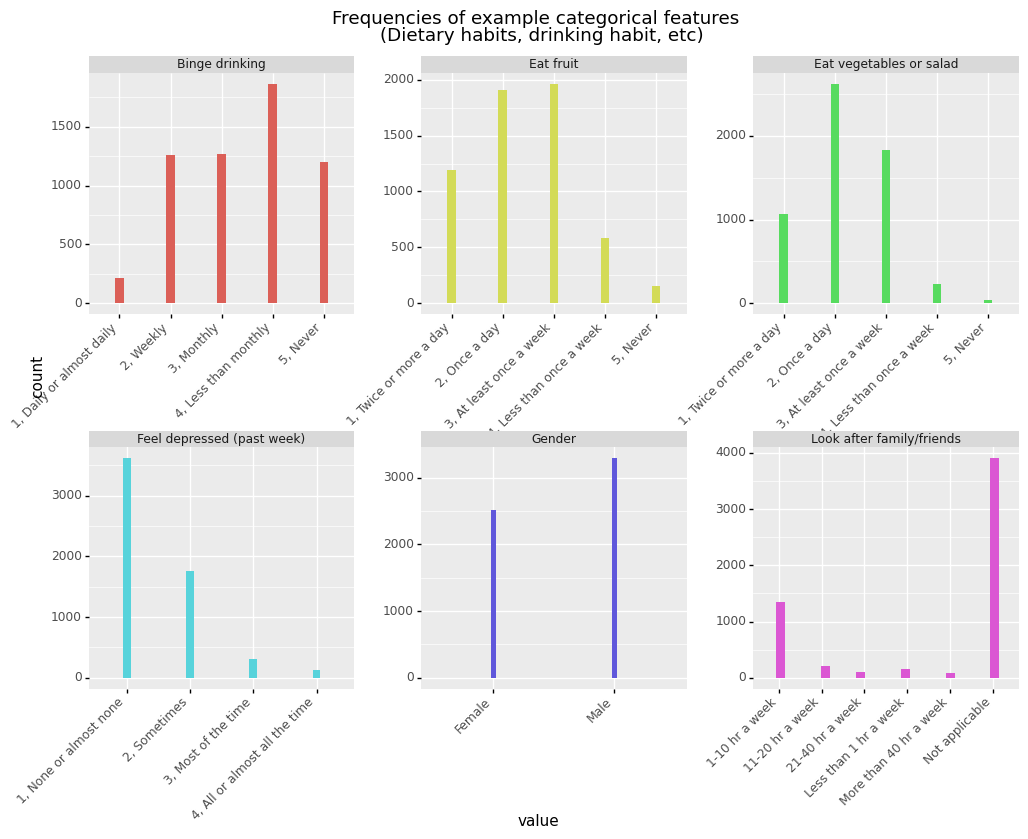

<ggplot: (315665333)>

In [23]:
temp = ess

# recode some values names for data viz
temp.loc[temp['etfruit']==1,['etfruit']] = "1, Twice or more a day"
temp.loc[temp['etfruit']==2,['etfruit']] = "1, Twice or more a day"
temp.loc[temp['etfruit']==3,['etfruit']] = "2, Once a day"
temp.loc[temp['etfruit']==4,['etfruit']] = "3, At least once a week"
temp.loc[temp['etfruit']==5,['etfruit']] = "3, At least once a week"
temp.loc[temp['etfruit']==6,['etfruit']] = "4, Less than once a week"
temp.loc[temp['etfruit']==7,['etfruit']] = "5, Never"

temp.loc[temp['eatveg'] == 1, ['eatveg']] = "1, Twice or more a day"
temp.loc[temp['eatveg'] == 2, ['eatveg']] = "1, Twice or more a day"
temp.loc[temp['eatveg'] == 3, ['eatveg']] = "2, Once a day"
temp.loc[temp['eatveg'] == 4, ['eatveg']] = "3, At least once a week"
temp.loc[temp['eatveg']==5,['eatveg']] = "3, At least once a week"
temp.loc[temp['eatveg']==6,['eatveg']] = "4, Less than once a week"
temp.loc[temp['eatveg']==7,['eatveg']] = "5, Never"

temp.loc[temp['alcbnge']==1,['alcbnge']] = "1, Daily or almost daily"
temp.loc[temp['alcbnge']==2,['alcbnge']] = "2, Weekly"
temp.loc[temp['alcbnge']==3,['alcbnge']] = "3, Monthly"
temp.loc[temp['alcbnge']==4,['alcbnge']] = "4, Less than monthly"
temp.loc[temp['alcbnge']==5,['alcbnge']] = "5, Never"
temp.loc[temp['alcbnge']==6,['alcbnge']] = "6, Not applicable"

temp.loc[temp['hlpfmhr']==1,['hlpfmhr']] = "1-10 hr a week"
temp.loc[temp['hlpfmhr']==2,['hlpfmhr']] = "11-20 hr a week"
temp.loc[temp['hlpfmhr']==3,['hlpfmhr']] = "21-40 hr a week"
temp.loc[temp['hlpfmhr']==4,['hlpfmhr']] = "21-40 hr a week"
temp.loc[temp['hlpfmhr']==5,['hlpfmhr']] = "More than 40 hr a week"
temp.loc[temp['hlpfmhr']==6,['hlpfmhr']] = "More than 40 hr a week"
temp.loc[temp['hlpfmhr']==55,['hlpfmhr']] = "Less than 1 hr a week"
temp.loc[temp['hlpfmhr']==66,['hlpfmhr']] = "Not applicable"

temp.loc[temp['fltdpr']==1,['fltdpr']] = "1, None or almost none"
temp.loc[temp['fltdpr']==2,['fltdpr']] = "2, Sometimes"
temp.loc[temp['fltdpr']==3,['fltdpr']] = "3, Most of the time"
temp.loc[temp['fltdpr']==4,['fltdpr']] = "4, All or almost all the time"

temp.loc[temp['icgndra']==1,['icgndra']] = "Male"
temp.loc[temp['icgndra']==2,['icgndra']] = "Female"

# choose which variables to visualize
temp98 = temp[["dosprt","cgtsday","alcwkdy","height","weight","dshltgp"]] #num
temp99 = temp[["etfruit","eatveg","alcbnge","hlpfmhr","fltdpr","icgndra"]] #cat

# change to descriptive var names
temp98.rename(columns={'dosprt': 'Do sports (last 7 days)', 
                       'cgtsday': 'Cigarettes smoked (per day)',
                       "alcwkdy":"Grams of alcohol (on a weekday)",
                       "height":"Height (cm)",
                       "weight":"Weight (kg)",
                       "dshltgp":"Discuss health with GP (past year)"}, inplace=True)
temp99.rename(columns={'etfruit': 'Eat fruit', 
                       'eatveg': 'Eat vegetables or salad',
                       'alcbnge': 'Binge drinking',
                       'hlpfmhr': 'Look after family/friends',
                       'fltdpr': 'Feel depressed (past week)',
                       'icgndra': 'Gender'}, inplace=True)


d1 = temp99.melt()
# plot proportion of policy features
p8=(
    ggplot(d1,aes(x="value", fill='variable')) +
    geom_histogram(bins=25) +
    facet_wrap("variable",scales='free') +
    ggtitle("Frequencies of example categorical features \n (Dietary habits, drinking habit, etc)")+
    theme(figure_size=(12,8),
          legend_position = "none",
          subplots_adjust={'wspace':0.25, 'hspace': 0.55},
         axis_text_x=element_text(rotation=45, hjust=1))
)
p8

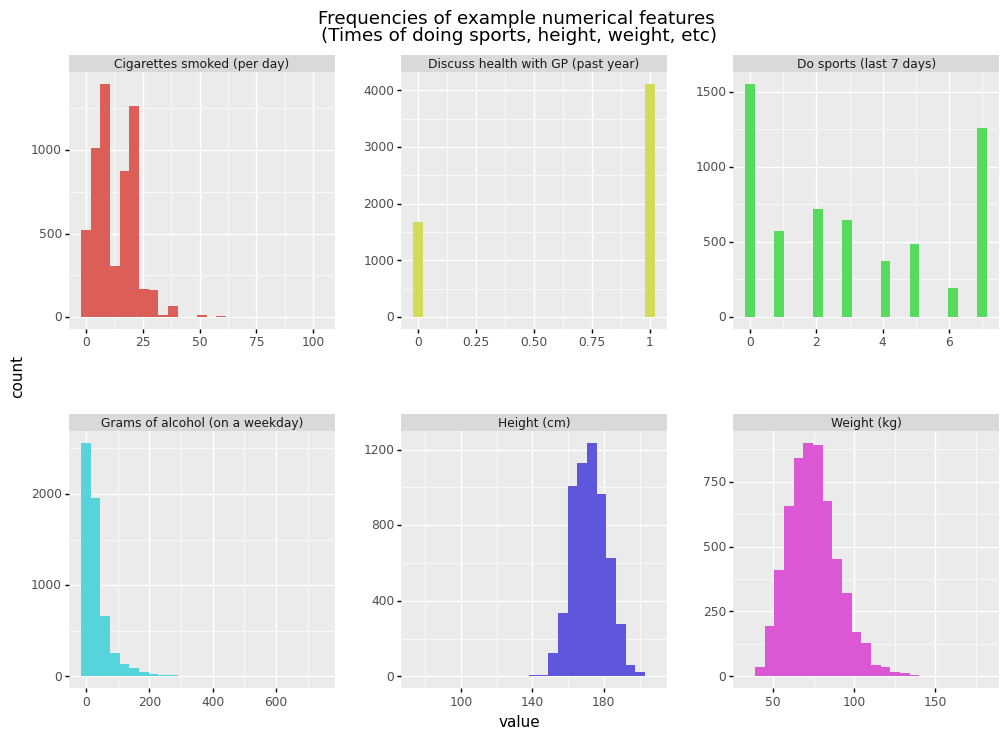

<ggplot: (315685816)>

In [24]:
# plot the distribution of numeric vars
d2 = temp98.melt()
p7= (
    ggplot(d2,aes(x="value", fill="variable")) +
    geom_histogram(bins=25) +
    facet_wrap("variable",scales='free') +
    labs(title = "Frequencies of example numerical features \n(Times of doing sports, height, weight, etc)")+
    theme(figure_size=(12,8),
          legend_position = "none",
          subplots_adjust={'wspace':0.25, 'hspace': 0.4})
)
p7

In [502]:
ggsave(plot=p8, filename='ccatt_ess.png', dpi=300, limitsize=False)

/Users/zixunhao/my_environment_name/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 12 x 8 in image.
/Users/zixunhao/my_environment_name/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ccatt_ess.png


In [10]:
## Standardize
from sklearn.preprocessing import StandardScaler

standard = StandardScaler()
ess_std = pd.DataFrame(standard.fit_transform(ess),
                       columns=ess.columns)

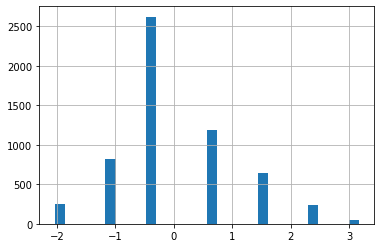

In [11]:
## Visualize data: eatveg - How often eat vegetables or salad, excluding potatoes
# after standardized
ess_std["eatveg"].hist(bins=30);

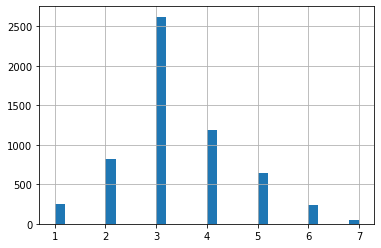

In [12]:
# before standardized
ess["eatveg"].hist(bins=30);

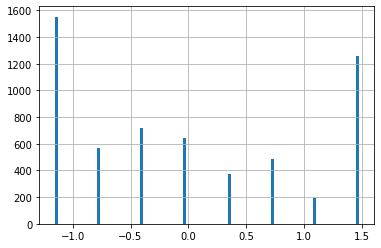

In [13]:
## Visualize data: dosprt - Do sports or other physical activity, how many of last 7 days 
# after standardized
ess_std["dosprt"].hist(bins=100);

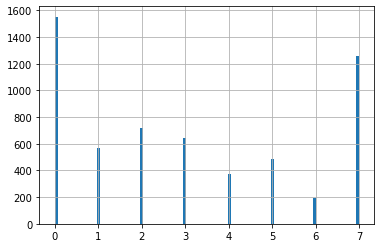

In [14]:
# before standardized
ess["dosprt"].hist(bins=100);

## Implement PCA

In [15]:
## Import PCA from sklearn
from sklearn.decomposition import PCA

## Instantiate model object: set to 5 components
pca = PCA(n_components=5)
## Fit model
mod = pca.fit(ess_std)

In [16]:
# Get loadings with items
pd.DataFrame(mod.components_.T,
            index=ess_std.columns).style.background_gradient(cmap='coolwarm')

,0,1,2,3,4
etfruit,0.024088,0.074955,0.136634,0.012124,0.068636
eatveg,0.006796,0.065392,0.145289,0.017134,0.075593
dosprt,-0.007302,0.023206,-0.087542,0.009021,-0.119322
cgtsmke,-0.004321,-0.056510,-0.088576,0.003954,-0.068071
cgtsday,0.013369,0.107920,0.133021,0.010316,0.107164
alcfreq,0.022217,-0.079975,-0.036306,0.004053,-0.116964
alcwkdy,-0.004916,0.070450,0.127280,0.022640,0.059863
alcwknd,-0.013209,0.107211,0.103278,0.040125,0.048172
icgndra,0.045631,-0.265889,-0.041515,-0.040316,-0.188262
alcbnge,0.006116,-0.102989,-0.077198,-0.035016,-0.074299


In [17]:
## Get the percentage of variance explained by each component
pd.DataFrame(np.round(mod.explained_variance_ratio_, 2)*100,
            index=["PC1", "PC2", "PC3", "PC4","PC5"]).T

,PC1,PC2,PC3,PC4,PC5
0,8.0,6.0,4.0,3.0,3.0


In [18]:
## Get cumulative variance explained by 5 components
pd.DataFrame(np.round(mod.explained_variance_ratio_, 2)*100,
            index=["PC1", "PC2", "PC3","PC4","PC5"]).T.sum(axis=1)

0    24.0
dtype: float64

## Interpret the Principal Components by Loadings

In [20]:
## View PCs and loadings
pc_loadings = pd.DataFrame(mod.components_.T,
            index=ess_std.columns,
            columns=["PC1",
                    "PC2",
                    "PC3",
                    "PC4",
                    "PC5"])
# sort the loadings for PC1 by descending order: observe the most positive and most negative loadings
pc_loadings.sort_values(by=['PC1'], ascending=False)

,PC1,PC2,PC3,PC4,PC5
medtrun,0.204707,-0.052900,-0.044112,0.440643,0.005380
hltprbn,0.177536,-0.015523,-0.131231,-0.132328,-0.021209
flteeff,0.170652,-0.045797,0.213059,-0.050498,-0.055685
slprl,0.169028,-0.044543,0.166817,-0.046583,-0.068528
fltdpr,0.166702,-0.049229,0.279456,-0.056315,-0.095121
...,...,...,...,...,...
dshltnt,-0.149323,0.102584,0.113120,0.015538,-0.155274
medtrnap,-0.204707,0.052900,0.044112,-0.440643,-0.005380
hltprnt,-0.222782,0.044517,0.144035,0.175263,-0.121330
hltphnap,-0.223056,0.045331,0.144906,0.174530,-0.122135


Positive loadings:
- medtrun: Unable to get medical consultation or treatment, last 12 months
- hltprbn: Health problems, last 12 months: back or neck pain
- flteeff: Felt everything did as effort, how often past week (the larger, the more often)
- slprl: Sleep was restless, how often past week

Negative loadings:
- medtrnu: Never unable to get medical consultation or treatment, reason, last 12 months
- hltphnap: Health problems, hampered, last 12 month: not applicable
- hltprnt: Health problems, last 12 months: none of these
- medtrnap: No medical consultation or treatment, reason: not applicable<br>
<b> Possible label: "General Physical and Mental Health"<b>

In [72]:
# sort the loadings for PC2 by descending order: observe the most positive and most negative loadings
pc_loadings.sort_values(by=['PC2'], ascending=False)

,PC1,PC2,PC3,PC4,PC5
jbexpvi,0.074992,0.301163,-0.046267,-0.002666,-0.033290
jbexevl,0.094005,0.284823,-0.063881,-0.003278,-0.050430
jbexebs,0.095108,0.276486,-0.041744,0.000305,-0.036496
jbexpmc,0.096535,0.275265,-0.027424,0.001789,-0.035869
jbexevh,0.090499,0.253164,-0.042880,0.006278,-0.054339
...,...,...,...,...,...
dshltgp,0.128122,-0.086870,-0.080971,-0.005736,0.151507
alcbnge,0.006115,-0.102977,-0.077333,-0.034697,-0.078414
jbexpnt,-0.112749,-0.239895,0.019165,0.010767,0.162632
icgndra,0.045632,-0.265887,-0.041462,-0.040700,-0.187593


Positive loadings:
- jbexpvi - In any job, ever exposed to: vibrations from hand tools or machinery
- jbexevl - In any job, ever exposed to: very loud noise
- jbexebs - In any job, ever exposed to: breathing in other types of smoke, fumes, powder, dust

Negative loadings:
- jbexent - In any job, ever exposed to: none of these (tiring or painful positions, vibration from machinery, heavy manual labor)
- icgndra - Interviewer code, gender of respondent 
- jbexpnt - In any job, ever exposed to: none of these (chemical, loud noise, extreme temperatures)<br>
<b> Possible label: "Exposure to Job Risk Factors"<b>

In [73]:
# sort the loadings for PC3 by descending order: observe the most positive and most negative loadings
pc_loadings.sort_values(by=['PC3'], ascending=False)

,PC1,PC2,PC3,PC4,PC5
fltdpr,0.166702,-0.049235,0.279458,-0.056166,-0.095474
fltsd,0.149348,-0.057971,0.264993,-0.057805,-0.115130
fltlnl,0.117128,-0.032161,0.250374,-0.045741,-0.087334
cldgng,0.141144,-0.025702,0.240513,-0.057113,-0.047296
trhltnt,-0.135485,0.083481,0.225839,0.121985,0.061839
...,...,...,...,...,...
fnsdfml,-0.092856,-0.024693,-0.135600,-0.004977,0.037127
trhltpt,0.106007,-0.043496,-0.138494,-0.075481,0.014526
trhltmt,0.076403,-0.036774,-0.159943,-0.089020,-0.049470
enjlf,-0.124254,0.016306,-0.256502,0.041055,0.050764


Positive loadings:
- fltdpr - Felt depressed, how often past week
- fltsd - Felt sad, how often past week
- fltlnl - Felt lonely, how often past week

Negative loadings:
- wrhpp - Were happy, how often past week
- enjlf - Enjoyed life, how often past week
- trhltmt - Treatments used for own health, last 12 months: massage therapy<br>
<b> Possible label: "Mental Wellbeing"<b>

In [74]:
# sort the loadings for PC4 by descending order: observe the most positive and most negative loadings
pc_loadings.sort_values(by=['PC4'], ascending=False)

,PC1,PC2,PC3,PC4,PC5
medtrun,0.204707,-0.052901,-0.044142,0.440723,0.003259
medtrnaa,0.113447,-0.042854,-0.032404,0.273406,0.024883
medtrwl,0.119702,-0.034458,-0.022795,0.265411,0.026435
medtrnt,0.083990,-0.006055,-0.044158,0.185858,-0.014075
hltprnt,-0.222782,0.044519,0.144018,0.175293,-0.124407
...,...,...,...,...,...
hltprpf,0.154757,0.004729,-0.035738,-0.108073,0.095450
hltprpa,0.148675,0.000170,-0.045965,-0.130238,0.040311
hltprbn,0.177535,-0.015533,-0.131244,-0.132305,-0.023124
medtrnu,-0.225886,0.089302,0.093699,-0.298846,-0.097146


Positive loadings (absolute loading > 0.20):
- medtrun - Unable to get medical consultation or treatment, last 12 months
- medtrnaa - No medical consultation or treatment, reason: no appointments available
- medtrwl - No medical consultation or treatment, reason: waiting list too long

Negative loadings (absolute loading > 0.20):
- medtrnap - No medical consultation or treatment, reason: not applicable
- medtrnu - Never unable to get medical consultation or treatment, reason, last 12 months<br>
<b> Possible label: "Availability of Medical Treatment"<b>


In [21]:
# sort the loadings for PC5 by descending order: observe the most positive and most negative loadings
pc_loadings.sort_values(by=['PC5'], ascending=False)

,PC1,PC2,PC3,PC4,PC5
hltprhb,0.086448,-0.004221,0.049835,-0.088223,0.282612
hltprhc,0.106221,-0.018665,0.063080,-0.054623,0.260506
hltphhc,0.089485,-0.008294,0.077106,-0.035989,0.240076
weight,-0.003698,0.171712,-0.004037,0.005546,0.233884
hltphhb,0.076169,0.002587,0.095679,-0.046910,0.220942
...,...,...,...,...,...
hlpfmly,0.069236,-0.023109,-0.082361,-0.056980,-0.141482
dshltnt,-0.149323,0.102584,0.113120,0.015538,-0.155274
jbexpnap,-0.035062,-0.064734,0.108723,0.017870,-0.175846
jbexenap,-0.035062,-0.064734,0.108723,0.017870,-0.175846


Positive loadings:
- hltprhb - Health problems, last 12 months: high blood pressure
- hltprhc - Health problems, last 12 months: heart or circulation problem
- hltphhc - Health problems, hampered, last 12 month: heart or circulation problem

Negative loadings (absolute loading all less than 0.20, but still showing them here):
- icgndra - Interviewer code, gender of respondent (1:male 2:female)
- jbexpnap - In any job, ever exposed to: not applicable (chemical, loud noise, extreme temperatures)
- jbexenap - In any job, ever exposed to: not applicable (tiring or painful positions, vibration from machinery, heavy manual labor)<br>
<b> Possible label: "Cardiovascular Issues"<b>

In [76]:
# give PCs sensible labels for interpretation
pd.DataFrame(mod.components_.T,
            index=ess_std.columns,
            columns=["General Physical and Mental Health",
                    "Exposure to Job Risk Factors",
                    "Mental Wellbeing",
                    "Availability of Medical Treatment",
                    "Cardiovascular Issues"]).sort_values(by=['General Physical and Mental Health'], ascending=False)

,General Physical and Mental Health,Exposure to Job Risk Factors,Mental Wellbeing,Availability of Medical Treatment,Cardiovascular Issues
medtrun,0.204707,-0.052901,-0.044142,0.440723,0.003259
hltprbn,0.177535,-0.015533,-0.131244,-0.132305,-0.023124
flteeff,0.170652,-0.045803,0.213072,-0.050457,-0.056185
slprl,0.169027,-0.044548,0.166829,-0.046600,-0.069135
fltdpr,0.166702,-0.049235,0.279458,-0.056166,-0.095474
...,...,...,...,...,...
dshltnt,-0.149324,0.102581,0.112995,0.015901,-0.164904
medtrnap,-0.204707,0.052901,0.044142,-0.440723,-0.003259
hltprnt,-0.222782,0.044519,0.144018,0.175293,-0.124407
hltphnap,-0.223056,0.045333,0.144890,0.174561,-0.125198


In [77]:
## View PCs and loadings and give PCs sensible labels for interpretation, add color for clarity
pd.DataFrame(mod.components_.T,
            index=ess_std.columns,
            columns=["General Physical and Mental Health",
                    "Exposure to Job Risk Factors",
                    "Mental Wellbeing",
                    "Availability of Medical Treatment",
                    "Cardiovascular Issues"]).style.background_gradient(cmap='coolwarm')

,General Physical and Mental Health,Exposure to Job Risk Factors,Mental Wellbeing,Availability of Medical Treatment,Cardiovascular Issues
etfruit,0.024089,0.074985,0.136531,0.011904,0.066897
eatveg,0.006796,0.065425,0.145172,0.017016,0.073832
dosprt,-0.007302,0.023192,-0.087463,0.008937,-0.117631
cgtsmke,-0.004322,-0.056531,-0.088543,0.004557,-0.064841
cgtsday,0.013370,0.107940,0.132993,0.009761,0.103736
alcfreq,0.022217,-0.079961,-0.036418,0.004217,-0.119641
alcwkdy,-0.004915,0.070439,0.127395,0.022300,0.062200
alcwknd,-0.013208,0.107205,0.103388,0.039810,0.051923
icgndra,0.045632,-0.265887,-0.041462,-0.040700,-0.187593
alcbnge,0.006115,-0.102977,-0.077333,-0.034697,-0.078414


## Hyperparameter tuning: n_components

In [78]:
## n_components between 0 & 1: returns number of components needed to explain at least x percent of variance
pca = PCA(n_components=0.50,
         svd_solver="full")

In [79]:
## Fit model
mod = pca.fit(ess_std)

In [80]:
mod.explained_variance_ratio_

array([0.07990726, 0.05594282, 0.04277231, 0.03398918, 0.02734637,
       0.02456491, 0.02402589, 0.0217889 , 0.02128411, 0.02026571,
       0.01927306, 0.01818649, 0.01725266, 0.01675012, 0.01609829,
       0.0154541 , 0.01509628, 0.01438594, 0.01416533, 0.01362472])

In [81]:
## Get % of variance explained
#pd.DataFrame(np.round(mod.explained_variance_ratio_, 2)*100,
            #index=["PC1", "PC2", "PC3", "PC4", "PC5","PC6","PC7","PC8","PC9","PC10","PC11",
                  #"PC12","PC13","PC14","PC15","PC16","PC17","PC18","PC19"]).T.sum(axis=1)
pd.DataFrame(np.round(mod.explained_variance_ratio_, 2)*100).T.sum(axis=1)

0    51.0
dtype: float64

## Deciding on number of components, scree plot

In [82]:
## Build df with number of components and explained variance
pc_df = pd.DataFrame(mod.explained_variance_ratio_,
                             index=np.arange(pca.n_components_) + 1,
                             columns=["percentage of variance"])

In [83]:
## Reset index, rename components (for plotting w/ altair)
pc_df = pc_df.reset_index()

In [84]:
pc_df = pc_df.rename(columns={"index":"components"})

In [100]:
# add a cumulative percentage of variance explained
pc_df["cumulative percentage"] = pc_df["percentage of variance"].cumsum() 
pc_df

,components,percentage of variance,cumsum,cumulative percentage
0,1,0.079907,0.079907,0.079907
1,2,0.055943,0.135850,0.135850
2,3,0.042772,0.178622,0.178622
3,4,0.033989,0.212612,0.212612
4,5,0.027346,0.239958,0.239958
5,6,0.024565,0.264523,0.264523
6,7,0.024026,0.288549,0.288549
7,8,0.021789,0.310338,0.310338
8,9,0.021284,0.331622,0.331622
9,10,0.020266,0.351887,0.351887


In [87]:
## visualize percentage of variance explained with seaborn
import seaborn as sns

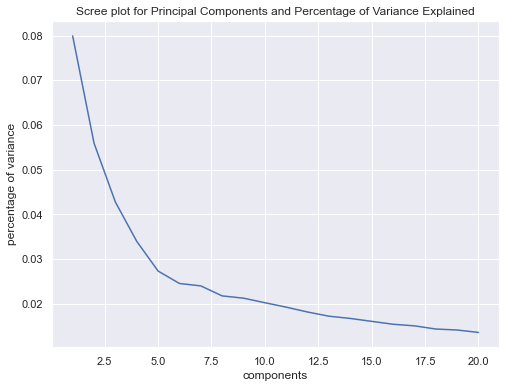

In [103]:
sns.set(rc={'figure.figsize':(8,6)})
scree = sns.lineplot(x = "components",
            y = "percentage of variance",
            data=pc_df).set_title("Scree plot for Principal Components and Percentage of Variance Explained")
fig = scree.get_figure()
fig.savefig("plot.png") 

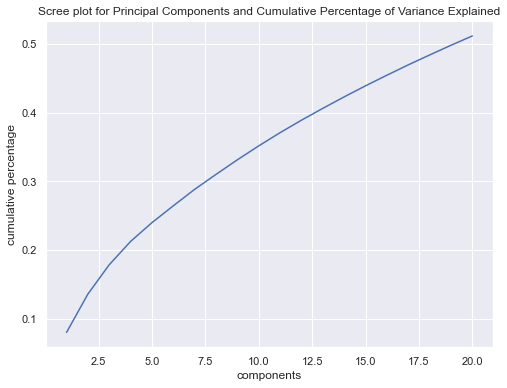

In [102]:
# cumulative percentage data viz
sns.set(rc={'figure.figsize':(8,6)})
scree1 = sns.lineplot(x = "components",
            y = "cumulative percentage",
            data=pc_df).set_title("Scree plot for Principal Components and Cumulative Percentage of Variance Explained")

### References
- THE EUROPEAN SOCIAL SURVEY (ESS) 2014 Data https://www.europeansocialsurvey.org/data/download.html?r=7
- ESS Codebook, ESS7-2014 ed. 1.0 2014 https://www.europeansocialsurvey.org/docs/round7/survey/ESS7_appendix_a7_e01_0.pdf